# Análise de recibos com o Reconhecimento de Formulários

![Um robô segurando um recibo](./images/receipt_analysis.jpg)

No campo de pesquisa visual computacional da inteligência artificial (IA), o reconhecimento óptico de caracteres (OCR) é comumente usado para ler documentos impressos ou manuscritos. Em geral, o texto é simplesmente extraído dos documentos em um formato que possa ser usado para processamento ou análise posterior.

Um cenário de OCR mais avançado é a extração de informações de formulários, como pedidos ou faturas de compras, com um reconhecimento semântico do que os campos daquele formulário representam. O serviço de **Reconhecimento de Formulários** foi desenvolvido especificamente para esse tipo de problema de IA.

## Ver um recibo

Neste exemplo, você usará o modelo integrado do Reconhecimento de Formulários para analisar recibos.

Clique no botão **Executar célula** (&#9655;) abaixo (à esquerda da célula) para executá-la e ver um exemplo de recibo que você analisará com o Reconhecimento de Formulários.

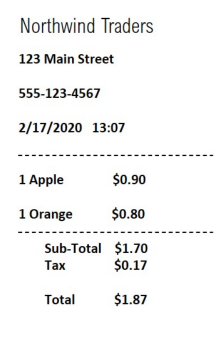

In [8]:
import matplotlib.pyplot as plt
from PIL import Image
import os
%matplotlib inline


# Carregar e exibir uma imagem de recibo
fig = plt.figure(figsize=(6, 6))
image_path = os.path.join('data', 'form-receipt', 'receipt.jpg')
img = Image.open(image_path)
plt.axis('off')
plt.imshow(img)

## Criar um recurso do Reconhecimento de Formulários

Comece criando um recurso de Reconhecimento de Formulários na sua assinatura do Azure:

1. Em outra guia do navegador, abra o portal do Azure em https://portal.azure.com, entrando com sua conta Microsoft.
2. Selecione **+ Criar um recurso** e pesquise por * Reconhecimento de Formulários*.
3. Na lista de serviços, selecione **Reconhecimento de Formulários**.
4. Na lâmina **Reconhecimento de Formulários**, selecione **Criar**.
5. Na lâmina **Criar**, insira os detalhes abaixo e selecione **Criar**
   - **Nome**: um nome exclusivo para seu serviço
   - **Assinatura**: sua assinatura do Azure
   - **Região**: Qualquer região disponível
   - **Tipo de preço**: F0
   - **Grupo de recursos**: O grupo de recursos existente usado anteriormente
   - **Confirmo que li e entendi os avisos abaixo**: Selecionado.
6. Aguarde até que o serviço seja criado.
7. Veja seu serviço de Reconhecimento de Formulários recém-criado no portal do Azure e na página **Chaves e pontos de extremidade**, copie os valores da **Chave 1** e do **Ponto de extremidade** e cole no código abaixo, substituindo **YOUR_FORM_KEY** e **YOUR_FORM_ENDPOINT**.

In [4]:
form_key = 'aed7f48e4ff84b0984447f75fd07ef8d'
form_endpoint = 'https://form-hsouza-01.cognitiveservices.azure.com/'

print('Ready to use form recognizer at {} using key {}'.format(form_endpoint, form_key))

Ready to use form recognizer at https://form-hsouza-01.cognitiveservices.azure.com/ using key aed7f48e4ff84b0984447f75fd07ef8d


## Analisar um recibo

Agora você já pode usar o Reconhecimento de Formulários para analisar um recibo.

In [9]:
import os
from azure.ai.formrecognizer import FormRecognizerClient
from azure.core.credentials import AzureKeyCredential

# Criar um cliente para o serviço de reconhecimento de formulários
form_recognizer_client = FormRecognizerClient(endpoint=form_endpoint, credential=AzureKeyCredential(form_key))

try:
    print("Analyzing receipt...")
    # Get the receipt image file
    image_path = os.path.join('data', 'form-receipt', 'receipt.jpg')

    # Submit the file data to form recognizer
    with open(image_path, "rb") as f:
        analyze_receipt = form_recognizer_client.begin_recognize_receipts(receipt=f)
    
    # Get the results
    receipt_data = analyze_receipt.result()

    # Print the extracted data for the first (and only) receipt
    receipt = receipt_data[0]
    receipt_type = receipt.fields.get("ReceiptType")
    if receipt_type:
        print("Receipt Type: {}".format(receipt_type.value))
    merchant_address = receipt.fields.get("MerchantAddress")
    if merchant_address:
        print("Merchant Address: {}".format(merchant_address.value))
    merchant_phone = receipt.fields.get("MerchantPhoneNumber")
    if merchant_phone:
        print("Merchant Phone: {}".format(merchant_phone.value))
    transaction_date = receipt.fields.get("TransactionDate")
    if transaction_date:
        print("Transaction Date: {}".format(transaction_date.value))
    print("Receipt items:")
    items = receipt.fields.get("Items")
    if items:
        for idx, item in enumerate(receipt.fields.get("Items").value):
            print("\tItem #{}".format(idx+1))
            item_name = item.value.get("Name")
            if item_name:
                print("\t - Name: {}".format(item_name.value))
            item_total_price = item.value.get("TotalPrice")
            if item_total_price:
                print("\t - Price: {}".format(item_total_price.value))
    subtotal = receipt.fields.get("Subtotal")
    if subtotal:
        print("Subtotal: {} ".format(subtotal.value))
    tax = receipt.fields.get("Tax")
    if tax:
        print("Tax: {}".format(tax.value))
    total = receipt.fields.get("Total")
    if total:
        print("Total: {}".format(total.value))

except Exception as ex:
    print('Error:', ex)


Analyzing receipt...
Receipt Type: Itemized
Merchant Address: 123 Main Street
Merchant Phone: +15551234567
Transaction Date: 2020-02-17
Receipt items:
	Item #1
	 - Name: Apple
	 - Price: 0.9
	Item #2
	 - Name: Orange
	 - Price: 0.8
Subtotal: 1.7 
Tax: 0.17
Total: 1.87


Observe que o Reconhecimento de Formulários é capaz de interpretar os dados do formulário, identificando corretamente o endereço e o número de telefone do comerciante, a data e a hora da transação, além dos itens de linha, subtotal, impostos e valores totais.

## Mais informações

Para mais informações sobre o serviço de Reconhecimento de Formulários, acesse a [documentação de Reconhecimento de Formulários](https://docs.microsoft.com/pt-br/azure/cognitive-services/form-recognizer/index)